In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('C:/ML_and_DL_project_Datasets/bee_data.csv')

In [3]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [4]:
df = df.sort_values('file')

In [5]:
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
3644,001_043.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker
3627,001_044.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker
3638,001_046.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker
3633,001_047.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker
3626,001_050.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian honey bee,healthy,False,worker


In [6]:
df['caste'].nunique()

1

In [7]:
df['pollen_carrying'].unique()

array([False,  True], dtype=bool)

# Getting the labels

## Given the image of a bee, we need to predict whether it is a pollen carrying or not

In [8]:
label = df['pollen_carrying']

In [9]:
label.head()

3644    False
3627    False
3638    False
3633    False
3626    False
Name: pollen_carrying, dtype: bool

In [10]:
label.unique()

array([False,  True], dtype=bool)

In [11]:
label = pd.get_dummies(label,drop_first=True)

In [12]:
label.nunique()

True    2
dtype: int64

In [13]:
label.head()

,True
3644,0
3627,0
3638,0
3633,0
3626,0


In [14]:
type(label)

pandas.core.frame.DataFrame

In [15]:
label = label.values

In [16]:
type(label)

numpy.ndarray

In [17]:
label[1]

array([0], dtype=uint8)

# Getting the features

In [18]:
path = "C:/ML_and_DL_project_Datasets/bee_imgs"

In [19]:
import os
import cv2

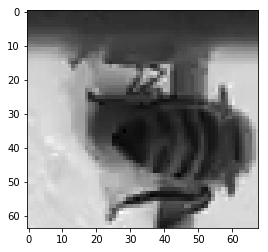

In [20]:
for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_arr,cmap="gray")
    break

In [21]:
label.shape

(5172, 1)

In [22]:
label[5171][0]

0

In [23]:
training_data = []
IMG_SIZE = 50
path = "C:/ML_and_DL_project_Datasets/bee_imgs"

In [24]:
def create_data(i):
    for img in os.listdir(path):
        print(i)
        x = label[i][0]
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,x])
        i = i + 1
        print('One image added')
        
    

In [25]:
create_data(0)

0
One image added
1
One image added
2
One image added
3
One image added
4
One image added
5
One image added
6
One image added
7
One image added
8
One image added
9
One image added
10
One image added
11
One image added
12
One image added
13
One image added
14
One image added
15
One image added
16
One image added
17
One image added
18
One image added
19
One image added
20
One image added
21
One image added
22
One image added
23
One image added
24
One image added
25
One image added
26
One image added
27
One image added
28
One image added
29
One image added
30
One image added
31
One image added
32
One image added
33
One image added
34
One image added
35
One image added
36
One image added
37
One image added
38
One image added
39
One image added
40
One image added
41
One image added
42
One image added
43
One image added
44
One image added
45
One image added
46
One image added
47
One image added
48
One image added
49
One image added
50
One image added
51
One image added
52
One image added
53


One image added
421
One image added
422
One image added
423
One image added
424
One image added
425
One image added
426
One image added
427
One image added
428
One image added
429
One image added
430
One image added
431
One image added
432
One image added
433
One image added
434
One image added
435
One image added
436
One image added
437
One image added
438
One image added
439
One image added
440
One image added
441
One image added
442
One image added
443
One image added
444
One image added
445
One image added
446
One image added
447
One image added
448
One image added
449
One image added
450
One image added
451
One image added
452
One image added
453
One image added
454
One image added
455
One image added
456
One image added
457
One image added
458
One image added
459
One image added
460
One image added
461
One image added
462
One image added
463
One image added
464
One image added
465
One image added
466
One image added
467
One image added
468
One image added
469
One image added
470


One image added
866
One image added
867
One image added
868
One image added
869
One image added
870
One image added
871
One image added
872
One image added
873
One image added
874
One image added
875
One image added
876
One image added
877
One image added
878
One image added
879
One image added
880
One image added
881
One image added
882
One image added
883
One image added
884
One image added
885
One image added
886
One image added
887
One image added
888
One image added
889
One image added
890
One image added
891
One image added
892
One image added
893
One image added
894
One image added
895
One image added
896
One image added
897
One image added
898
One image added
899
One image added
900
One image added
901
One image added
902
One image added
903
One image added
904
One image added
905
One image added
906
One image added
907
One image added
908
One image added
909
One image added
910
One image added
911
One image added
912
One image added
913
One image added
914
One image added
915


One image added
1374
One image added
1375
One image added
1376
One image added
1377
One image added
1378
One image added
1379
One image added
1380
One image added
1381
One image added
1382
One image added
1383
One image added
1384
One image added
1385
One image added
1386
One image added
1387
One image added
1388
One image added
1389
One image added
1390
One image added
1391
One image added
1392
One image added
1393
One image added
1394
One image added
1395
One image added
1396
One image added
1397
One image added
1398
One image added
1399
One image added
1400
One image added
1401
One image added
1402
One image added
1403
One image added
1404
One image added
1405
One image added
1406
One image added
1407
One image added
1408
One image added
1409
One image added
1410
One image added
1411
One image added
1412
One image added
1413
One image added
1414
One image added
1415
One image added
1416
One image added
1417
One image added
1418
One image added
1419
One image added
1420
One image add

One image added
1806
One image added
1807
One image added
1808
One image added
1809
One image added
1810
One image added
1811
One image added
1812
One image added
1813
One image added
1814
One image added
1815
One image added
1816
One image added
1817
One image added
1818
One image added
1819
One image added
1820
One image added
1821
One image added
1822
One image added
1823
One image added
1824
One image added
1825
One image added
1826
One image added
1827
One image added
1828
One image added
1829
One image added
1830
One image added
1831
One image added
1832
One image added
1833
One image added
1834
One image added
1835
One image added
1836
One image added
1837
One image added
1838
One image added
1839
One image added
1840
One image added
1841
One image added
1842
One image added
1843
One image added
1844
One image added
1845
One image added
1846
One image added
1847
One image added
1848
One image added
1849
One image added
1850
One image added
1851
One image added
1852
One image add

2315
One image added
2316
One image added
2317
One image added
2318
One image added
2319
One image added
2320
One image added
2321
One image added
2322
One image added
2323
One image added
2324
One image added
2325
One image added
2326
One image added
2327
One image added
2328
One image added
2329
One image added
2330
One image added
2331
One image added
2332
One image added
2333
One image added
2334
One image added
2335
One image added
2336
One image added
2337
One image added
2338
One image added
2339
One image added
2340
One image added
2341
One image added
2342
One image added
2343
One image added
2344
One image added
2345
One image added
2346
One image added
2347
One image added
2348
One image added
2349
One image added
2350
One image added
2351
One image added
2352
One image added
2353
One image added
2354
One image added
2355
One image added
2356
One image added
2357
One image added
2358
One image added
2359
One image added
2360
One image added
2361
One image added
2362
One imag

One image added
2838
One image added
2839
One image added
2840
One image added
2841
One image added
2842
One image added
2843
One image added
2844
One image added
2845
One image added
2846
One image added
2847
One image added
2848
One image added
2849
One image added
2850
One image added
2851
One image added
2852
One image added
2853
One image added
2854
One image added
2855
One image added
2856
One image added
2857
One image added
2858
One image added
2859
One image added
2860
One image added
2861
One image added
2862
One image added
2863
One image added
2864
One image added
2865
One image added
2866
One image added
2867
One image added
2868
One image added
2869
One image added
2870
One image added
2871
One image added
2872
One image added
2873
One image added
2874
One image added
2875
One image added
2876
One image added
2877
One image added
2878
One image added
2879
One image added
2880
One image added
2881
One image added
2882
One image added
2883
One image added
2884
One image add

One image added
3481
One image added
3482
One image added
3483
One image added
3484
One image added
3485
One image added
3486
One image added
3487
One image added
3488
One image added
3489
One image added
3490
One image added
3491
One image added
3492
One image added
3493
One image added
3494
One image added
3495
One image added
3496
One image added
3497
One image added
3498
One image added
3499
One image added
3500
One image added
3501
One image added
3502
One image added
3503
One image added
3504
One image added
3505
One image added
3506
One image added
3507
One image added
3508
One image added
3509
One image added
3510
One image added
3511
One image added
3512
One image added
3513
One image added
3514
One image added
3515
One image added
3516
One image added
3517
One image added
3518
One image added
3519
One image added
3520
One image added
3521
One image added
3522
One image added
3523
One image added
3524
One image added
3525
One image added
3526
One image added
3527
One image add

One image added
4061
One image added
4062
One image added
4063
One image added
4064
One image added
4065
One image added
4066
One image added
4067
One image added
4068
One image added
4069
One image added
4070
One image added
4071
One image added
4072
One image added
4073
One image added
4074
One image added
4075
One image added
4076
One image added
4077
One image added
4078
One image added
4079
One image added
4080
One image added
4081
One image added
4082
One image added
4083
One image added
4084
One image added
4085
One image added
4086
One image added
4087
One image added
4088
One image added
4089
One image added
4090
One image added
4091
One image added
4092
One image added
4093
One image added
4094
One image added
4095
One image added
4096
One image added
4097
One image added
4098
One image added
4099
One image added
4100
One image added
4101
One image added
4102
One image added
4103
One image added
4104
One image added
4105
One image added
4106
One image added
4107
One image add

4608
One image added
4609
One image added
4610
One image added
4611
One image added
4612
One image added
4613
One image added
4614
One image added
4615
One image added
4616
One image added
4617
One image added
4618
One image added
4619
One image added
4620
One image added
4621
One image added
4622
One image added
4623
One image added
4624
One image added
4625
One image added
4626
One image added
4627
One image added
4628
One image added
4629
One image added
4630
One image added
4631
One image added
4632
One image added
4633
One image added
4634
One image added
4635
One image added
4636
One image added
4637
One image added
4638
One image added
4639
One image added
4640
One image added
4641
One image added
4642
One image added
4643
One image added
4644
One image added
4645
One image added
4646
One image added
4647
One image added
4648
One image added
4649
One image added
4650
One image added
4651
One image added
4652
One image added
4653
One image added
4654
One image added
4655
One imag

5006
One image added
5007
One image added
5008
One image added
5009
One image added
5010
One image added
5011
One image added
5012
One image added
5013
One image added
5014
One image added
5015
One image added
5016
One image added
5017
One image added
5018
One image added
5019
One image added
5020
One image added
5021
One image added
5022
One image added
5023
One image added
5024
One image added
5025
One image added
5026
One image added
5027
One image added
5028
One image added
5029
One image added
5030
One image added
5031
One image added
5032
One image added
5033
One image added
5034
One image added
5035
One image added
5036
One image added
5037
One image added
5038
One image added
5039
One image added
5040
One image added
5041
One image added
5042
One image added
5043
One image added
5044
One image added
5045
One image added
5046
One image added
5047
One image added
5048
One image added
5049
One image added
5050
One image added
5051
One image added
5052
One image added
5053
One imag

In [26]:
training_data

[[array([[ 54,  55,  56, ...,  52,  51,  54],
         [ 55,  56,  57, ...,  54,  53,  56],
         [ 57,  57,  58, ...,  55,  55,  57],
         ..., 
         [178, 175, 174, ..., 175, 175, 175],
         [178, 175, 176, ..., 174, 174, 174],
         [176, 178, 175, ..., 173, 173, 173]], dtype=uint8), 0],
 [array([[181, 180, 179, ..., 179, 179, 179],
         [179, 178, 178, ..., 179, 179, 179],
         [179, 179, 181, ..., 179, 179, 179],
         ..., 
         [181, 181, 178, ..., 177, 180, 181],
         [180, 179, 178, ..., 177, 179, 180],
         [178, 178, 178, ..., 181, 179, 179]], dtype=uint8), 0],
 [array([[167, 167, 167, ..., 172, 172, 172],
         [167, 167, 167, ..., 172, 172, 172],
         [167, 167, 167, ..., 172, 172, 172],
         ..., 
         [170, 170, 170, ..., 131, 131, 129],
         [169, 169, 169, ..., 130, 130, 127],
         [168, 167, 167, ..., 129, 129, 125]], dtype=uint8), 0],
 [array([[178, 178, 179, ..., 182, 185, 182],
         [178, 178, 179,

In [27]:
print(len(training_data))

5172


## Now,that we have obtained the data, we need to shuffle the data

In [28]:
import random

In [29]:
random.shuffle(training_data)

In [30]:
X = []
y = []

for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [31]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [32]:
y = np.array(y).reshape(-1,1)

In [33]:
X.shape

(5172, 50, 50, 1)

In [34]:
y.shape

(5172, 1)

## CREATING THE MODEL

### We'll normalize the images first

In [35]:
X = X/255.0

### Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Imports

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense,Conv2D,Activation,Flatten,Dropout,MaxPooling2D

### Building the model

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
model.add(Flatten())
model.add(Dense(units=64))
model.add(Activation('relu'))

In [43]:
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [44]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

### Training our model

In [45]:
model.fit(X_train,y_train,batch_size=20,epochs=10)

Epoch 1/10
3620/3620 [==============================] - 20s 6ms/step - loss: 0.0587 - acc: 0.9967
Epoch 2/10
3620/3620 [==============================] - 20s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 3/10
3620/3620 [==============================] - 20s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 4/10
3620/3620 [==============================] - 22s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 5/10
3620/3620 [==============================] - 22s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 6/10
3620/3620 [==============================] - 22s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 7/10
3620/3620 [==============================] - 21s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 8/10
3620/3620 [==============================] - 21s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 9/10
3620/3620 [==============================] - 22s 6ms/step - loss: 0.0534 - acc: 0.9967
Epoch 10/10
3620/3620 [==============================] - 20s 6ms/step - loss: 0.0534 - acc: 0.9967


### Taking Predictions

In [46]:
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
pred[pred>0.5] = 1

In [49]:
pred[pred<=0.5] = 0

In [50]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1546
          1       0.00      0.00      0.00         6

avg / total       0.99      1.00      0.99      1552



C:\PythonIDE\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
